Weights: [ 1.26712229  2.20688701 -0.59115221]
Accuracy: 82.32558139534883 %


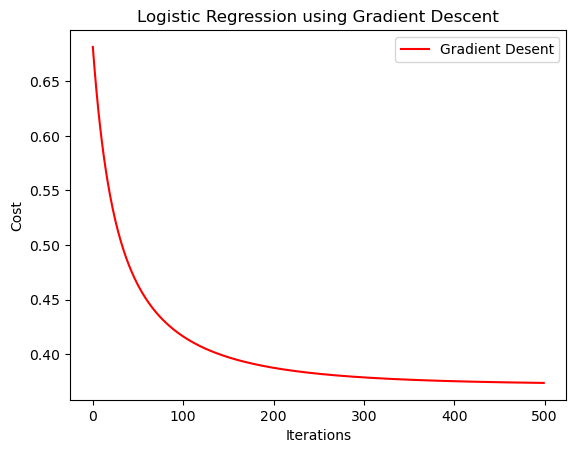

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load data
data = pd.read_csv("Placement_Data.csv")

# Convert Placed / Not Placed to 1 / 0
data['status'] = data['status'].map({'Placed': 1, 'Not Placed': 0})

# Take only 2 features (simple)
X = data[['ssc_p', 'mba_p']].values
y = data['status'].values


# Standard Scaler (Normalization)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add bias column (1)
m = len(y)
X = np.c_[np.ones(m), X]

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    h = sigmoid(X @ theta)
    return (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

# Gradient Descent
theta = np.zeros(X.shape[1])
alpha = 0.1
cost_history = []

for i in range(500):
    z = X @ theta
    h = sigmoid(z)
    gradient = (1/m) * X.T @ (h - y)
    theta = theta - alpha * gradient
    
    cost = cost_function(X, y, theta)
    cost_history.append(cost)

# Prediction
y_pred = (sigmoid(X @ theta) >= 0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred == y) * 100
print("Weights:", theta)
print("Accuracy:", accuracy, "%")

# -----------------------------
# PLOT: Cost vs Iterations
# -----------------------------
plt.figure()
plt.plot(cost_history, color="red", label = "Gradient Desent")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Logistic Regression using Gradient Descent")
plt.legend()
plt.show()